In [1]:
#dependancy
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from gmplot import gmplot # for google maps


In [2]:
price_file=os.path.join("price.csv")
price_df=pd.read_csv(price_file)
#get all data
price_df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [3]:
#drop columns with nan
price_df.drop(price_df.columns[6:20], axis=1, inplace=True)
del price_df["January 2017"]
price_df

,City Code,City,Metro,County,State,Population Rank,January 2012,February 2012,March 2012,April 2012,...,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016
0,6181,New York,New York,Queens,NY,1,1752.0,1764.0,1778.0,1792,...,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2172.0,2175.0,2177.0,2183,...,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748
2,17426,Chicago,Chicago,Cook,IL,3,1484.0,1485.0,1489.0,1494,...,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644
3,39051,Houston,Houston,Harris,TX,4,1194.0,1196.0,1199.0,1200,...,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1080.0,1083.0,1087.0,1091,...,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1029.0,1029.0,1032.0,1034,...,1218,1228,1236,1240,1240,1238,1238,1239,1241,1244
6,18959,Las Vegas,Las Vegas,Clark,NV,7,1137.0,1133.0,1130.0,1127,...,1217,1222,1225,1227,1227,1227,1228,1230,1234,1237
7,6915,San Antonio,San Antonio,Bexar,TX,8,1033.0,1038.0,1043.0,1045,...,1241,1244,1245,1245,1241,1236,1234,1235,1239,1245
8,54296,San Diego,San Diego,San Diego,CA,9,2019.0,2020.0,2015.0,2006,...,2400,2414,2428,2438,2442,2441,2442,2449,2457,2465
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,1103.0,1101.0,1102.0,1104,...,1327,1338,1347,1353,1358,1364,1370,1377,1385,1389


In [4]:
# sort populations ranks and assign urban, suburban and rural;
#urban up to 100
#suburban upto 2000
#rural <2000
#make loop in order to add in these conditions
city_type=[]
for i in range(len(price_df["Population Rank"]-1)):
    if price_df["Population Rank"][i] <= 100:
        city_type.append("Urban")
    elif price_df["Population Rank"][i] > 100 and price_df["Population Rank"][i] <= 2000:
        city_type.append("Suburban")
    else:
        city_type.append("Rural")
price_df["City Type"]=city_type
price_df.head(10)

,City Code,City,Metro,County,State,Population Rank,January 2012,February 2012,March 2012,April 2012,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,City Type
0,6181,New York,New York,Queens,NY,1,1752.0,1764.0,1778.0,1792,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,Urban
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2172.0,2175.0,2177.0,2183,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,Urban
2,17426,Chicago,Chicago,Cook,IL,3,1484.0,1485.0,1489.0,1494,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,Urban
3,39051,Houston,Houston,Harris,TX,4,1194.0,1196.0,1199.0,1200,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,Urban
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1080.0,1083.0,1087.0,1091,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,Urban
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1029.0,1029.0,1032.0,1034,...,1228,1236,1240,1240,1238,1238,1239,1241,1244,Urban
6,18959,Las Vegas,Las Vegas,Clark,NV,7,1137.0,1133.0,1130.0,1127,...,1222,1225,1227,1227,1227,1228,1230,1234,1237,Urban
7,6915,San Antonio,San Antonio,Bexar,TX,8,1033.0,1038.0,1043.0,1045,...,1244,1245,1245,1241,1236,1234,1235,1239,1245,Urban
8,54296,San Diego,San Diego,San Diego,CA,9,2019.0,2020.0,2015.0,2006,...,2414,2428,2438,2442,2441,2442,2449,2457,2465,Urban
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,1103.0,1101.0,1102.0,1104,...,1338,1347,1353,1358,1364,1370,1377,1385,1389,Urban


In [5]:
#Select metro areas of intrest
price_df_selected=price_df.loc[(price_df["Metro"]=="San Francisco") | 
                      (price_df["Metro"]=="San Jose") | (price_df["Metro"]=="Houston") |
                      (price_df["State"]=="NY") & (price_df["Metro"]=="New York")]
                       
price_df_selected

,City Code,City,Metro,County,State,Population Rank,January 2012,February 2012,March 2012,April 2012,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,City Type
0,6181,New York,New York,Queens,NY,1,1752.0,1764.0,1778.0,1792,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,Urban
3,39051,Houston,Houston,Harris,TX,4,1194.0,1196.0,1199.0,1200,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,Urban
10,33839,San Jose,San Jose,Santa Clara,CA,11,2359.0,2366.0,2370.0,2373,...,3347,3368,3386,3391,3383,3363,3341,3320,3300,Urban
12,20330,San Francisco,San Francisco,San Francisco,CA,13,2974.0,2983.0,3001.0,3019,...,4527,4519,4517,4511,4500,4488,4472,4457,4424,Urban
42,13072,Oakland,San Francisco,Alameda,CA,43,1722.0,1737.0,1749.0,1754,...,2795,2819,2845,2869,2883,2890,2895,2892,2886,Urban
102,11540,Fremont,San Francisco,Alameda,CA,103,2166.0,2179.0,2185.0,2194,...,3123,3149,3171,3174,3171,3169,3173,3173,3163,Suburban
148,34937,Yonkers,New York,Westchester,NY,149,2113.0,2107.0,2096.0,2097,...,2472,2487,2491,2481,2465,2457,2466,2498,2522,Suburban
149,18518,Hayward,San Francisco,Alameda,CA,150,1763.0,1776.0,1793.0,1811,...,2555,2568,2589,2607,2629,2650,2669,2676,2674,Suburban
192,54626,Sunnyvale,San Jose,Santa Clara,CA,193,2762.0,2782.0,2800.0,2815,...,3835,3851,3873,3886,3888,3874,3860,3846,3827,Suburban
197,19865,Pasadena,Houston,Harris,TX,198,1085.0,1083.0,1083.0,1085,...,1319,1322,1325,1324,1326,1327,1328,1326,1321,Suburban


In [6]:
#clean data set and make averages, make new data frame for cleaned data


Data_Price_Clean=pd.DataFrame(price_df_selected["City"])
Data_Price_Clean["State"]=price_df_selected["State"]                            
Data_Price_Clean["Metro"]=price_df_selected["Metro"]
Data_Price_Clean["City Type"]=price_df_selected["City Type"]

#get averages for each year

Data_Price_Clean["Average 2012"]=price_df_selected.loc[:,"January 2012":"December 2012"].mean(axis=1)
Data_Price_Clean["Average 2013"]=price_df_selected.loc[:,"January 2013":"December 2013"].mean(axis=1)
Data_Price_Clean["Average 2014"]=price_df_selected.loc[:,"January 2014":"December 2014"].mean(axis=1)
Data_Price_Clean["Average 2015"]=price_df_selected.loc[:,"January 2015":"December 2015"].mean(axis=1)
Data_Price_Clean["Average 2016"]=price_df_selected.loc[:,"January 2016":"December 2016"].mean(axis=1)

Data_Price_Clean.head(20)

,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016
0,New York,NY,New York,Urban,1798.833333,1947.250000,2115.083333,2264.916667,2331.416667
3,Houston,TX,Houston,Urban,1197.583333,1249.083333,1317.416667,1409.666667,1440.250000
10,San Jose,CA,San Jose,Urban,2398.083333,2515.666667,2705.166667,3130.250000,3343.583333
12,San Francisco,CA,San Francisco,Urban,3037.583333,3276.416667,3708.500000,4319.250000,4503.083333
42,Oakland,CA,San Francisco,Urban,1721.250000,1776.916667,2008.750000,2490.916667,2834.833333
102,Fremont,CA,San Francisco,Suburban,2220.166667,2340.833333,2553.833333,2948.000000,3146.000000
148,Yonkers,NY,New York,Suburban,2106.666667,2168.666667,2155.833333,2310.416667,2473.250000
149,Hayward,CA,San Francisco,Suburban,1808.500000,1914.916667,2086.250000,2355.666667,2598.333333
192,Sunnyvale,CA,San Jose,Suburban,2812.916667,2904.750000,3255.583333,3736.083333,3859.166667
197,Pasadena,TX,Houston,Suburban,1096.750000,1138.000000,1209.500000,1287.500000,1320.750000


In [7]:
#Check values counts 
Data_Price_Clean["State"].value_counts()

NY    221
CA    105
TX    103
Name: State, dtype: int64

In [8]:
#clean NaN out from data set
Data_Price_Clean=Data_Price_Clean.dropna(axis=1)
Data_Price_Clean["State"].value_counts()

NY    221
CA    105
TX    103
Name: State, dtype: int64

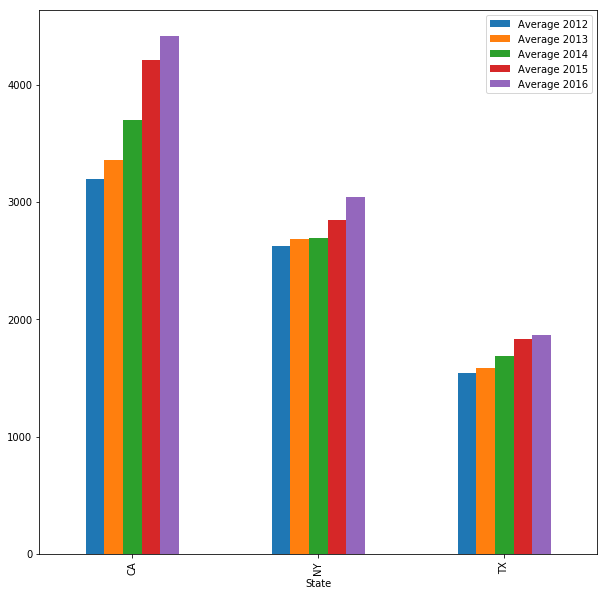

In [9]:
#group by  state ; plot state to state comparison data
Data_Price_Clean_State_Only=Data_Price_Clean.groupby(["State"]).mean()
Data_Price_Clean_State_Only
Data_Price_Clean_State_Only.plot(kind="bar", figsize=(10,10))
plt.show()

In [10]:
#group by city type and state ; plot state to state comparison data
Data_Price_Clean_State_Comp=Data_Price_Clean.groupby(["State", "City Type"]).mean()
Data_Price_Clean_State_Comp

Average 2012  Average 2013  Average 2014  Average 2015  \
State City Type                                                           
CA    Rural       3873.421769   4085.969388   4517.442177   5125.624150   
      Suburban    2606.584906   2724.705975   2988.333333   3415.990566   
      Urban       2385.638889   2523.000000   2807.472222   3313.472222   
NY    Rural       2676.028509   2729.281579   2736.956140   2901.783772   
      Suburban    2315.394444   2423.619444   2401.275000   2532.916667   
      Urban       1798.833333   1947.250000   2115.083333   2264.916667   
TX    Rural       1579.355485   1620.345992   1732.419831   1895.575949   
      Suburban    1431.934783   1469.094203   1553.202899   1651.192029   
      Urban       1197.583333   1249.083333   1317.416667   1409.666667   

                 Average 2016  
State City Type                
CA    Rural       5354.295918  
      Suburban    3586.672956  
      Urban       3560.500000  
NY    Rural       3096.345175  
      Suburban    2720.180556  
      Urban       2331.416667  
TX    Rural       1925.996835  
      Suburban    1664.043478  
      Urban       1440.250000

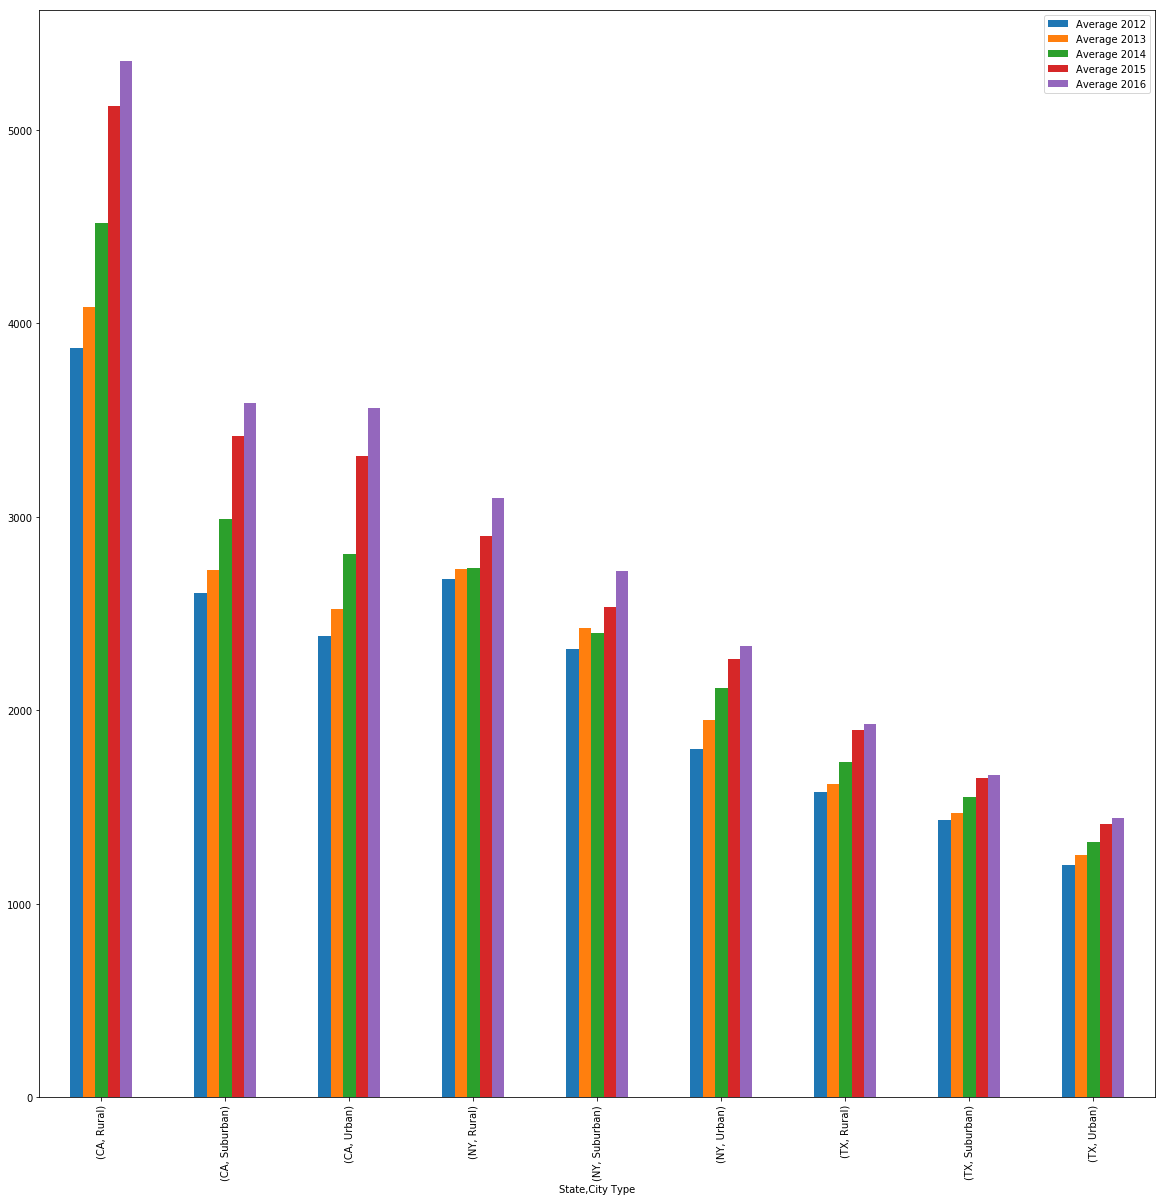

In [11]:
Data_Price_Clean_State_Comp.plot(kind="bar", figsize=(20,20))
plt.show()
plt.savefig("Data_Price_Clean_State_Comp.png")

In [12]:
Data_Price_Clean_Overall_Increase=Data_Price_Clean
Data_Price_Clean_Overall_Increase["Overall % Increase"]=round(100*((Data_Price_Clean["Average 2016"]-Data_Price_Clean["Average 2012"])/Data_Price_Clean["Average 2016"]),2)

Data_Price_Clean_Overall_Increase.head()

,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016,Overall % Increase
0,New York,NY,New York,Urban,1798.833333,1947.250000,2115.083333,2264.916667,2331.416667,22.84
3,Houston,TX,Houston,Urban,1197.583333,1249.083333,1317.416667,1409.666667,1440.250000,16.85
10,San Jose,CA,San Jose,Urban,2398.083333,2515.666667,2705.166667,3130.250000,3343.583333,28.28
12,San Francisco,CA,San Francisco,Urban,3037.583333,3276.416667,3708.500000,4319.250000,4503.083333,32.54
42,Oakland,CA,San Francisco,Urban,1721.250000,1776.916667,2008.750000,2490.916667,2834.833333,39.28


In [13]:
###################### drawing google maps ###################

#from https://simplemaps.com/data/us-cities get the file with lat/long for each us city
us_cities_file=os.path.join("uscitiesv1.4.csv")
us_cities_df=pd.read_csv(us_cities_file)
#get all data

In [14]:
us_cities_df.rename(columns = {'state_id':'State', 'city':'City'}, inplace = True)
us_cities_df.head()

,City,city_ascii,State,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659


In [15]:
cities_data = pd.merge(Data_Price_Clean, us_cities_df, on=['City', 'State'])
cities_data

,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016,Overall % Increase,...,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,New York,NY,New York,Urban,1798.833333,1947.250000,2115.083333,2264.916667,2331.416667,22.84,...,40.6943,-73.9249,19164071.0,8537673.0,10934.0,polygon,True,America/New_York,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Houston,TX,Houston,Urban,1197.583333,1249.083333,1317.416667,1409.666667,1440.250000,16.85,...,29.7871,-95.3936,5424720.0,2303482.0,1412.0,polygon,True,America/Chicago,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925
2,San Jose,CA,San Jose,Urban,2398.083333,2515.666667,2705.166667,3130.250000,3343.583333,28.28,...,37.3020,-121.8488,1804359.0,1025350.0,2242.0,polygon,True,America/Los_Angeles,95118 95128 95124 95125 95126 95127 95120 9512...,1840021570
3,San Francisco,CA,San Francisco,Urban,3037.583333,3276.416667,3708.500000,4319.250000,4503.083333,32.54,...,37.7561,-122.4429,3548847.0,870887.0,7170.0,polygon,True,America/Los_Angeles,94130 94131 94132 94133 94134 94108 94103 9410...,1840021543
4,Oakland,CA,San Francisco,Urban,1721.250000,1776.916667,2008.750000,2490.916667,2834.833333,39.28,...,37.7903,-122.2165,420005.0,420005.0,2901.0,polygon,True,America/Los_Angeles,94621 94705 94704 94611 94610 94613 94619 9461...,1840020296
5,Fremont,CA,San Francisco,Suburban,2220.166667,2340.833333,2553.833333,2948.000000,3146.000000,29.43,...,37.5256,-121.9870,233136.0,233136.0,1162.0,polygon,True,America/Los_Angeles,94536 94538 94539 94555 94537,1840020292
6,Yonkers,NY,New York,Suburban,2106.666667,2168.666667,2155.833333,2310.416667,2473.250000,14.82,...,40.9466,-73.8674,200807.0,200807.0,4304.0,polygon,True,America/New_York,10708 10703 10701 10705 10704 10707 10710 10702,1840003478
7,Hayward,CA,San Francisco,Suburban,1808.500000,1914.916667,2086.250000,2355.666667,2598.333333,30.40,...,37.6327,-122.0776,158937.0,158937.0,1351.0,polygon,True,America/Los_Angeles,94541 94542 94545 94544 94540 94543 94557,1840020293
8,Sunnyvale,CA,San Jose,Suburban,2812.916667,2904.750000,3255.583333,3736.083333,3859.166667,27.11,...,37.3846,-122.0261,152771.0,152771.0,2683.0,polygon,True,America/Los_Angeles,95002 94085 94086 94087 94089 94088,1840021573
9,Pasadena,TX,Houston,Suburban,1096.750000,1138.000000,1209.500000,1287.500000,1320.750000,16.96,...,29.6583,-95.1498,153351.0,153351.0,1361.0,polygon,True,America/Chicago,77058 77059 77586 77506 77507 77504 77505 7750...,1840020930


In [16]:
CA_cities = cities_data[(cities_data.State == 'CA') & ((cities_data.Metro == 'San Francisco') | (cities_data.Metro == 'San Jose'))]
CA_cities

,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016,Overall % Increase,...,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
2,San Jose,CA,San Jose,Urban,2398.083333,2515.666667,2705.166667,3130.250000,3343.583333,28.28,...,37.3020,-121.8488,1804359.0,1025350.0,2242.0,polygon,True,America/Los_Angeles,95118 95128 95124 95125 95126 95127 95120 9512...,1840021570
3,San Francisco,CA,San Francisco,Urban,3037.583333,3276.416667,3708.500000,4319.250000,4503.083333,32.54,...,37.7561,-122.4429,3548847.0,870887.0,7170.0,polygon,True,America/Los_Angeles,94130 94131 94132 94133 94134 94108 94103 9410...,1840021543
4,Oakland,CA,San Francisco,Urban,1721.250000,1776.916667,2008.750000,2490.916667,2834.833333,39.28,...,37.7903,-122.2165,420005.0,420005.0,2901.0,polygon,True,America/Los_Angeles,94621 94705 94704 94611 94610 94613 94619 9461...,1840020296
5,Fremont,CA,San Francisco,Suburban,2220.166667,2340.833333,2553.833333,2948.000000,3146.000000,29.43,...,37.5256,-121.9870,233136.0,233136.0,1162.0,polygon,True,America/Los_Angeles,94536 94538 94539 94555 94537,1840020292
7,Hayward,CA,San Francisco,Suburban,1808.500000,1914.916667,2086.250000,2355.666667,2598.333333,30.40,...,37.6327,-122.0776,158937.0,158937.0,1351.0,polygon,True,America/Los_Angeles,94541 94542 94545 94544 94540 94543 94557,1840020293
8,Sunnyvale,CA,San Jose,Suburban,2812.916667,2904.750000,3255.583333,3736.083333,3859.166667,27.11,...,37.3846,-122.0261,152771.0,152771.0,2683.0,polygon,True,America/Los_Angeles,95002 94085 94086 94087 94089 94088,1840021573
11,Concord,CA,San Francisco,Suburban,1870.000000,1979.083333,2187.000000,2363.250000,2496.166667,25.09,...,37.9722,-122.0016,649437.0,128726.0,1627.0,polygon,True,America/Los_Angeles,94518 94519 94521 94520 94522 94524 94527,1840018905
12,Santa Clara,CA,San Jose,Suburban,2485.583333,2620.416667,2928.583333,3351.000000,3502.166667,29.03,...,37.3646,-121.9679,125948.0,125948.0,2641.0,polygon,True,America/Los_Angeles,95054 95050 95051 95053 95052 95055 95056,1840021571
14,Berkeley,CA,San Francisco,Suburban,2250.083333,2276.250000,2675.500000,3303.000000,3503.666667,35.78,...,37.8723,-122.2760,121240.0,121240.0,4472.0,polygon,True,America/Los_Angeles,94708 94707 94705 94704 94703 94702 94709 9471...,1840018914
15,San Mateo,CA,San Francisco,Suburban,2760.916667,2949.083333,3214.000000,3676.250000,3851.833333,28.32,...,37.5522,-122.3122,103959.0,103959.0,3309.0,polygon,True,America/Los_Angeles,94404 94401 94402 94403 94497,1840021551


In [17]:
CA_cities_sf = cities_data[(cities_data.State == 'CA') & (cities_data.Metro == 'San Francisco')]
CA_cities_sf.head()

,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016,Overall % Increase,...,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
3,San Francisco,CA,San Francisco,Urban,3037.583333,3276.416667,3708.500000,4319.250000,4503.083333,32.54,...,37.7561,-122.4429,3548847.0,870887.0,7170.0,polygon,True,America/Los_Angeles,94130 94131 94132 94133 94134 94108 94103 9410...,1840021543
4,Oakland,CA,San Francisco,Urban,1721.250000,1776.916667,2008.750000,2490.916667,2834.833333,39.28,...,37.7903,-122.2165,420005.0,420005.0,2901.0,polygon,True,America/Los_Angeles,94621 94705 94704 94611 94610 94613 94619 9461...,1840020296
5,Fremont,CA,San Francisco,Suburban,2220.166667,2340.833333,2553.833333,2948.000000,3146.000000,29.43,...,37.5256,-121.9870,233136.0,233136.0,1162.0,polygon,True,America/Los_Angeles,94536 94538 94539 94555 94537,1840020292
7,Hayward,CA,San Francisco,Suburban,1808.500000,1914.916667,2086.250000,2355.666667,2598.333333,30.40,...,37.6327,-122.0776,158937.0,158937.0,1351.0,polygon,True,America/Los_Angeles,94541 94542 94545 94544 94540 94543 94557,1840020293
11,Concord,CA,San Francisco,Suburban,1870.000000,1979.083333,2187.000000,2363.250000,2496.166667,25.09,...,37.9722,-122.0016,649437.0,128726.0,1627.0,polygon,True,America/Los_Angeles,94518 94519 94521 94520 94522 94524 94527,1840018905


In [18]:
CA_cities_sj = cities_data[(cities_data.State == 'CA') & (cities_data.Metro == 'San Jose')]
CA_cities_sj.head()

,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016,Overall % Increase,...,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
2,San Jose,CA,San Jose,Urban,2398.083333,2515.666667,2705.166667,3130.250000,3343.583333,28.28,...,37.3020,-121.8488,1804359.0,1025350.0,2242.0,polygon,True,America/Los_Angeles,95118 95128 95124 95125 95126 95127 95120 9512...,1840021570
8,Sunnyvale,CA,San Jose,Suburban,2812.916667,2904.750000,3255.583333,3736.083333,3859.166667,27.11,...,37.3846,-122.0261,152771.0,152771.0,2683.0,polygon,True,America/Los_Angeles,95002 94085 94086 94087 94089 94088,1840021573
12,Santa Clara,CA,San Jose,Suburban,2485.583333,2620.416667,2928.583333,3351.000000,3502.166667,29.03,...,37.3646,-121.9679,125948.0,125948.0,2641.0,polygon,True,America/Los_Angeles,95054 95050 95051 95053 95052 95055 95056,1840021571
24,Mountain View,CA,San Jose,Suburban,2958.083333,3028.583333,3561.250000,4132.750000,4162.333333,28.93,...,37.4001,-122.0796,80447.0,80447.0,2589.0,polygon,True,America/Los_Angeles,94040 94041 94043 94039 94042,1840020332
31,Palo Alto,CA,San Jose,Suburban,4211.833333,4562.250000,5263.666667,6209.416667,6133.916667,31.34,...,37.3917,-122.1465,67024.0,67024.0,1084.0,polygon,True,America/Los_Angeles,94022 95033 94303 94301 94306 94304 94302,1840020333


In [19]:
NY_cities = cities_data[(cities_data.State == 'NY') & (cities_data.Metro == 'New York')]
NY_cities.head()

,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016,Overall % Increase,...,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,New York,NY,New York,Urban,1798.833333,1947.250000,2115.083333,2264.916667,2331.416667,22.84,...,40.6943,-73.9249,19164071.0,8537673.0,10934.0,polygon,True,America/New_York,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
6,Yonkers,NY,New York,Suburban,2106.666667,2168.666667,2155.833333,2310.416667,2473.250000,14.82,...,40.9466,-73.8674,200807.0,200807.0,4304.0,polygon,True,America/New_York,10708 10703 10701 10705 10704 10707 10710 10702,1840003478
28,New Rochelle,NY,New York,Suburban,2919.000000,3042.583333,2914.750000,3234.916667,3389.166667,13.87,...,40.9305,-73.7836,79557.0,79557.0,2967.0,polygon,True,America/New_York,10804 10801 10805 10802,1840000782
37,Mount Vernon,NY,New York,Suburban,2091.333333,2194.750000,2120.416667,2280.083333,2427.916667,13.86,...,40.9136,-73.8291,68344.0,68344.0,6016.0,polygon,True,America/New_York,10552 10550 10553 10551,1840000781
39,Valley Stream,NY,New York,Suburban,2295.583333,2452.166667,2404.833333,2513.333333,2714.916667,15.45,...,40.6647,-73.7044,37673.0,37673.0,4180.0,polygon,True,America/New_York,11580 11581 11582,1840005331


In [20]:
TX_cities = cities_data[(cities_data.State == 'TX') & (cities_data.Metro == 'Houston')]
TX_cities.head()

,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016,Overall % Increase,...,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
1,Houston,TX,Houston,Urban,1197.583333,1249.083333,1317.416667,1409.666667,1440.250000,16.85,...,29.7871,-95.3936,5424720.0,2303482.0,1412.0,polygon,True,America/Chicago,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925
9,Pasadena,TX,Houston,Suburban,1096.750000,1138.000000,1209.500000,1287.500000,1320.750000,16.96,...,29.6583,-95.1498,153351.0,153351.0,1361.0,polygon,True,America/Chicago,77058 77059 77586 77506 77507 77504 77505 7750...,1840020930
10,Sugar Land,TX,Houston,Suburban,1925.166667,2006.166667,2097.666667,2182.416667,2112.166667,8.85,...,29.5956,-95.6283,88177.0,88177.0,1013.0,polygon,True,America/Chicago,77498 77478 77479 77487 77496,1840022217
13,Conroe,TX,Houston,Suburban,1390.166667,1438.083333,1508.250000,1572.916667,1570.500000,11.48,...,30.3174,-95.4705,82286.0,82286.0,583.0,polygon,True,America/Chicago,77384 77301 77303 77304 77305,1840019586
20,Pearland,TX,Houston,Suburban,1669.916667,1685.166667,1771.500000,1927.250000,1937.916667,13.83,...,29.5585,-95.3201,113570.0,113570.0,946.0,polygon,True,America/Chicago,77047 77089 77584 77581 77588,1840020979


In [21]:
# defining circle colors by city type
def city_color(city_type):
    if city_type == 'Urban':  #blue
        return 'b'  
    elif city_type == 'Rural':   #black
        return 'k'
    else:
        return 'r'  #red for suburban


In [22]:
#https://github.com/vgm64/gmplot

#CA_cities.columns: 3 - City Type, 9 - Overall % Increase, 14 - lat, 15 - lng
# CA SF,SJ metros map
gmap = gmplot.GoogleMapPlotter(CA_cities.iloc[0, 14], CA_cities.iloc[0, 15], zoom=11)
for ind, row in CA_cities.reset_index().iterrows():    
    lats, lngs = zip(*[(CA_cities.iloc[ind, 14], CA_cities.iloc[ind, 15])])
    circle_size = CA_cities.iloc[ind, 9] * 70
    gmap.scatter(lats, lngs, city_color(CA_cities.iloc[ind, 3]), size=circle_size, marker=False)

# Draw
gmap.draw("CA_map.html")

In [23]:
# NY metro map
gmap = gmplot.GoogleMapPlotter(NY_cities.iloc[0, 14], NY_cities.iloc[0, 15], zoom=11)
for ind, row in NY_cities.reset_index().iterrows():    
    lats, lngs = zip(*[(NY_cities.iloc[ind, 14], NY_cities.iloc[ind, 15])])
    circle_size = NY_cities.iloc[ind, 9] * 70
    gmap.scatter(lats, lngs, city_color(NY_cities.iloc[ind, 3]), size=circle_size, marker=False)

# Draw
gmap.draw("NY_map.html")

In [24]:
# TX metro map
gmap = gmplot.GoogleMapPlotter(TX_cities.iloc[0, 14], TX_cities.iloc[0, 15], zoom=11)
for ind, row in TX_cities.reset_index().iterrows():    
    lats, lngs = zip(*[(TX_cities.iloc[ind, 14], TX_cities.iloc[ind, 15])])
    circle_size = TX_cities.iloc[ind, 9] * 70
    gmap.scatter(lats, lngs, city_color(TX_cities.iloc[ind, 3]), size=circle_size, marker=False)

# Draw
gmap.draw("TX_map.html")
